# 03 — Exploratory Data Analysis / Análisis Exploratorio de Datos

**EN:** This notebook performs an initial exploration of the processed stamina dataset
(`stamina_dataset.csv`) to understand the distribution of difficulty labels, identify
highly correlated features, and spot visual patterns between individual features and
the target variable. The insights gathered here will guide feature selection before
model training.

**ES:** Este notebook realiza una exploración inicial del dataset de stamina procesado
(`stamina_dataset.csv`) para entender la distribución de los niveles de dificultad,
identificar características altamente correlacionadas y detectar patrones visuales
entre características individuales y la variable objetivo. Los hallazgos aquí guiarán
la selección de características antes del entrenamiento del modelo.

## 0. Setup / Configuración

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations

%pip install seaborn

import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ES: Configurar rutas del proyecto para que src/ sea importable.
# EN: Configure project paths so that src/ is importable.
NOTEBOOK_DIR = Path.cwd()
PROJECT_ROOT = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == "notebooks" else NOTEBOOK_DIR
SRC_PATH = PROJECT_ROOT / "src"
if str(SRC_PATH) not in sys.path:
    sys.path.insert(0, str(SRC_PATH))

# ES: Ruta al dataset procesado generado por build_dataset.py.
# EN: Path to the processed dataset generated by build_dataset.py.
PROCESSED_DATA_PATH: Path = PROJECT_ROOT / "data" / "processed" / "stamina_dataset.csv"

print(f"PROJECT_ROOT : {PROJECT_ROOT}")
print(f"PROCESSED_DATA_PATH : {PROCESSED_DATA_PATH}")
print(f"File exists : {PROCESSED_DATA_PATH.exists()}")

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
PROJECT_ROOT : /home/maru/Documents/Tesina/ITGStamina-rater-ml/ml-core
PROCESSED_DATA_PATH : /home/maru/Documents/Tesina/ITGStamina-rater-ml/ml-core/data/processed/stamina_dataset.csv
File exists : True


## 1. Load Data / Carga de Datos

**EN:** Read the processed CSV and perform a quick sanity check: shape, column dtypes, and missing value counts.

**ES:** Leer el CSV procesado y realizar una verificación rápida: dimensiones, tipos de columnas y conteo de valores faltantes.

In [3]:
# ES: Cargar el dataset procesado en un DataFrame de Pandas.
# EN: Load the processed dataset into a Pandas DataFrame.
df = pd.read_csv(PROCESSED_DATA_PATH)

print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
display(df.head())
df.info()

Shape: 2872 rows × 15 columns



,chart_id,source_file,difficulty,total_stream_length,max_stream_length,break_count,stream_break_ratio,average_nps,ebpm,has_bursts,burst_count,total_burst_notes,peak_ebpm,avg_burst_ebpm,max_burst_length
0,6b890391,Stamina RPG 8 - Unlocks/[43] Another Lovely Be...,43,388,126,6,4.850000,24.881443,450.0,True,1,10,281.2,281.2,1
1,54cdab93,Stamina RPG 8 - Unlocks/[43] Jehovah's YaHVeH/...,43,453,113,8,14.612903,24.544082,440.0,True,1,9,247.5,247.5,1
2,e6a19820,Stamina RPG 8 - Unlocks/[43] Never Die/Never D...,43,238,127,1,14.000000,27.257875,464.0,False,0,0,NaN,NaN,0
3,61306d82,East Coast Stamina 14 - Speed/[43] Moon Over t...,43,433,93,7,6.873016,25.521226,450.0,True,5,59,365.6,331.8,1
4,36cb699b,Stamina RPG 8 - Unlocks/[42] Cry of the Brave/...,42,544,183,7,10.880000,25.619954,430.0,False,0,0,NaN,NaN,0


<class 'pandas.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chart_id             2872 non-null   str    
 1   source_file          2872 non-null   str    
 2   difficulty           2872 non-null   int64  
 3   total_stream_length  2872 non-null   int64  
 4   max_stream_length    2872 non-null   int64  
 5   break_count          2872 non-null   int64  
 6   stream_break_ratio   2634 non-null   float64
 7   average_nps          2872 non-null   float64
 8   ebpm                 2869 non-null   float64
 9   has_bursts           2872 non-null   bool   
 10  burst_count          2872 non-null   int64  
 11  total_burst_notes    2872 non-null   int64  
 12  peak_ebpm            2358 non-null   float64
 13  avg_burst_ebpm       2358 non-null   float64
 14  max_burst_length     2872 non-null   int64  
dtypes: bool(1), float64(5), int64(7), str(2)
memory u

## 2. Target Distribution / Distribución del Target

**EN:** Before training any model it is critical to check whether the target classes are balanced. A heavily skewed distribution (e.g. many level-15 charts but very few level-25 charts) can mislead accuracy metrics and bias the model towards the majority class.

**ES:** Antes de entrenar cualquier modelo es fundamental verificar si las clases objetivo están balanceadas. Una distribución muy sesgada (p.ej. muchos charts de nivel 15 pero muy pocos de nivel 25) puede distorsionar las métricas de exactitud y sesgar el modelo hacia la clase mayoritaria.

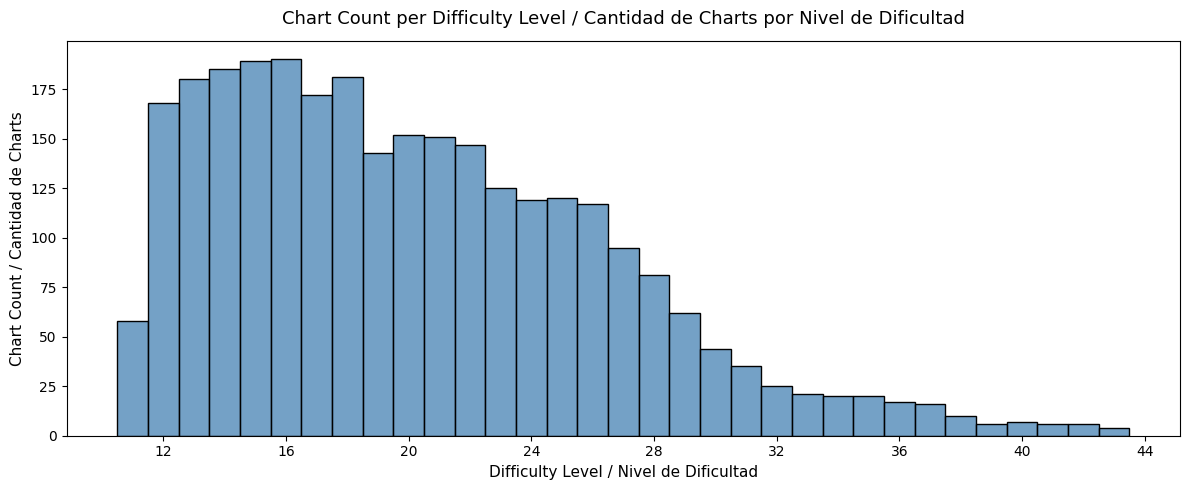

In [4]:
# ES: Histograma de la columna 'difficulty' (variable objetivo).
#     Cada barra representa cuántos charts existen para cada nivel de dificultad.
#     discrete=True asegura una barra por valor entero sin interpolación.
# EN: Histogram of the 'difficulty' column (target variable).
#     Each bar represents how many charts exist at each difficulty level.
#     discrete=True ensures one bar per integer value with no interpolation.

fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(
    data=df,
    x="difficulty",
    discrete=True,
    kde=False,
    color="steelblue",
    ax=ax,
)

ax.set_title(
    "Chart Count per Difficulty Level / Cantidad de Charts por Nivel de Dificultad",
    fontsize=13,
    pad=12,
)
ax.set_xlabel("Difficulty Level / Nivel de Dificultad", fontsize=11)
ax.set_ylabel("Chart Count / Cantidad de Charts", fontsize=11)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## 3. Correlation Matrix / Matriz de Correlación

**EN:** The Pearson correlation matrix measures the linear relationship between every pair of numeric columns. Values close to **+1** indicate a strong positive relationship; values close to **-1** indicate a strong inverse relationship. The column `difficulty` is our target — features with a high absolute correlation to it are the most informative predictors and should be prioritised during feature selection.

**ES:** La matriz de correlación de Pearson mide la relación lineal entre cada par de columnas numéricas. Valores cercanos a **+1** indican una relación positiva fuerte; valores cercanos a **-1** indican una relación inversa fuerte. La columna `difficulty` es nuestro objetivo — las características con alta correlación absoluta con ella son los predictores más informativos y deben priorizarse durante la selección de características.

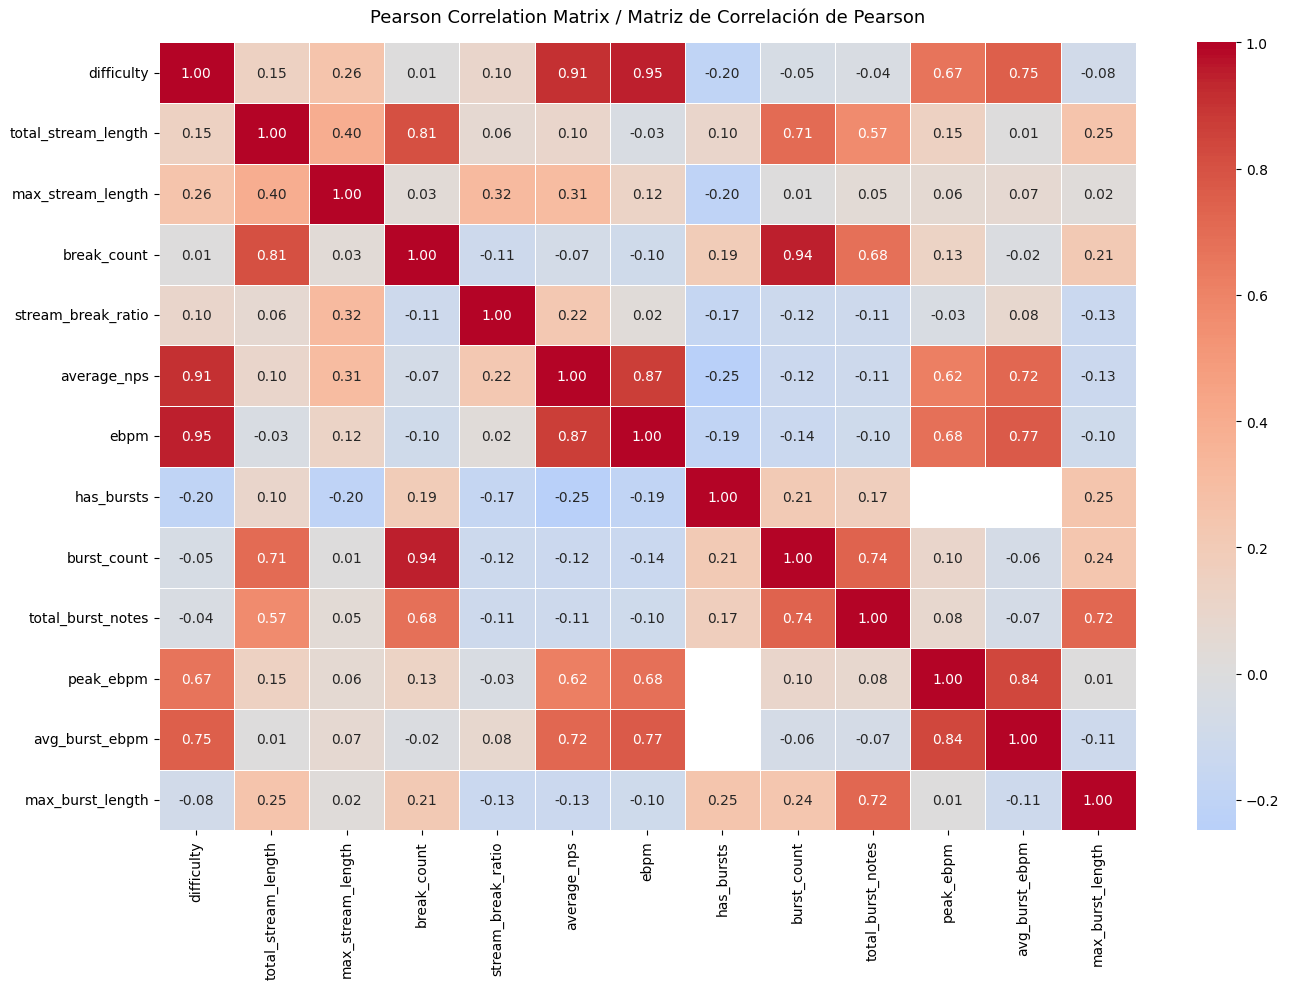


Correlations with 'difficulty' (sorted by |r|):
ebpm                   0.950706
average_nps            0.911959
avg_burst_ebpm         0.746571
peak_ebpm              0.668194
max_stream_length      0.258030
has_bursts             0.198360
total_stream_length    0.146116
stream_break_ratio     0.102125
max_burst_length       0.084036
burst_count            0.049087
total_burst_notes      0.038062
break_count            0.008777


In [5]:
# ES: Calcular la matriz de correlación de Pearson sobre columnas numéricas.
#     numeric_only=True excluye columnas de texto como 'source_file'.
# EN: Compute the Pearson correlation matrix over numeric columns only.
#     numeric_only=True excludes text columns such as 'source_file'.
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    ax=ax,
)

ax.set_title(
    "Pearson Correlation Matrix / Matriz de Correlación de Pearson",
    fontsize=13,
    pad=14,
)

plt.tight_layout()
plt.show()

# ES: Mostrar correlaciones con 'difficulty' ordenadas de mayor a menor valor absoluto.
# EN: Show correlations with 'difficulty' sorted by absolute value (descending).
print("\nCorrelations with 'difficulty' (sorted by |r|):")
print(corr["difficulty"].drop("difficulty").abs().sort_values(ascending=False).to_string())

## 4. Feature vs Target Scatter Plots / Gráficos de Dispersión Feature vs Objetivo

**EN:** Scatter plots reveal whether the relationship between a single feature and the target is monotonic, clustered, or noisy. `total_stream_length` captures the total volume of streaming content; `peak_ebpm` captures the effective BPM of the hardest burst section. Both are expected to increase with difficulty.

**ES:** Los gráficos de dispersión revelan si la relación entre una característica individual y el objetivo es monótona, agrupada o ruidosa. `total_stream_length` captura el volumen total de contenido en stream; `peak_ebpm` captura el BPM efectivo del burst más intenso. Se espera que ambos aumenten con la dificultad.

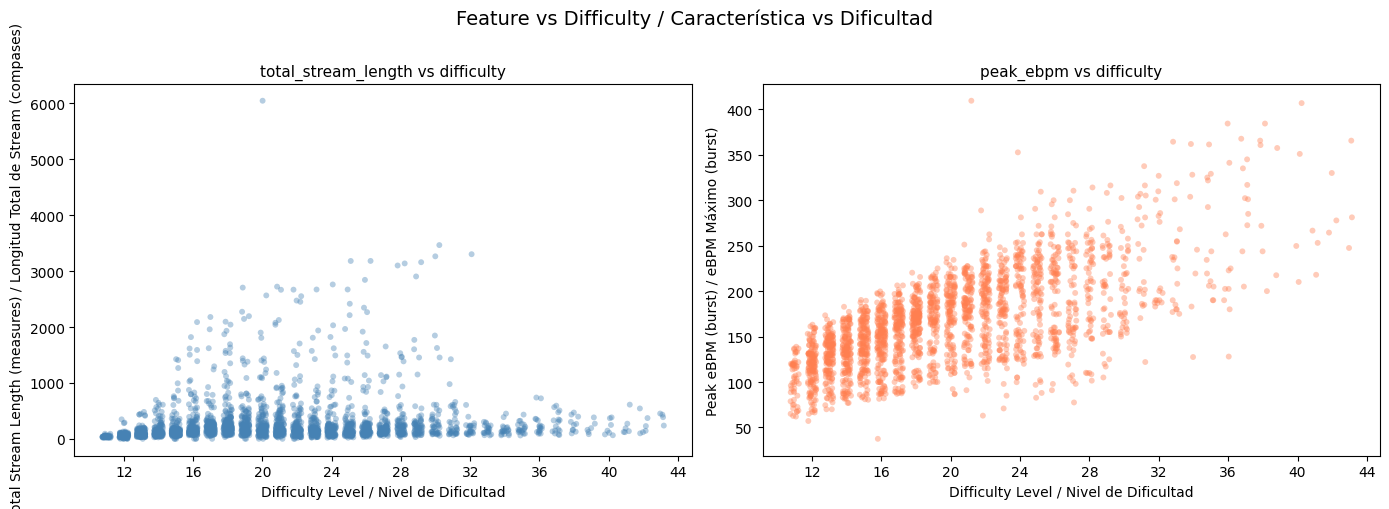

In [6]:
# ES: Añadir jitter horizontal a 'difficulty' para evitar superposición de puntos.
#     Los niveles de dificultad son enteros, por lo que sin jitter los puntos se
#     apilan en columnas verticales perfectas.
# EN: Add horizontal jitter to 'difficulty' to avoid point overlap.
#     Difficulty levels are integers, so without jitter points stack in perfect
#     vertical columns.
rng = np.random.default_rng(seed=42)
jitter = rng.uniform(-0.25, 0.25, size=len(df))
difficulty_jittered = df["difficulty"] + jitter

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(
    "Feature vs Difficulty / Característica vs Dificultad",
    fontsize=14,
    y=1.01,
)

# ── Left plot: total_stream_length ──────────────────────────────────────────
# ES: Longitud total de stream vs dificultad.
# EN: Total stream length vs difficulty.
axes[0].scatter(
    difficulty_jittered,
    df["total_stream_length"],
    alpha=0.4,
    s=18,
    color="steelblue",
    edgecolors="none",
)
axes[0].set_xlabel("Difficulty Level / Nivel de Dificultad", fontsize=10)
axes[0].set_ylabel("Total Stream Length (measures) / Longitud Total de Stream (compases)", fontsize=10)
axes[0].set_title("total_stream_length vs difficulty", fontsize=11)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# ── Right plot: peak_ebpm ────────────────────────────────────────────────────
# ES: eBPM máximo de burst vs dificultad.
# EN: Peak burst eBPM vs difficulty.
axes[1].scatter(
    difficulty_jittered,
    df["peak_ebpm"],
    alpha=0.4,
    s=18,
    color="coral",
    edgecolors="none",
)
axes[1].set_xlabel("Difficulty Level / Nivel de Dificultad", fontsize=10)
axes[1].set_ylabel("Peak eBPM (burst) / eBPM Máximo (burst)", fontsize=10)
axes[1].set_title("peak_ebpm vs difficulty", fontsize=11)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()